### Project 1 - Pranaav Rai
I want to invest $10,000 in my taxable brokerage account in one of the following strategies.
***Convince me which one I should use.***

1. Buy-and-hold the SPY exchange-traded fund (ETF)
2. Hold SPY intraday only (i.e., buy at open and sell at close)
3. Hold SPY overnight only (i.e., buy at close and sell at open)

Explain how these strategies perform differently using daily data.
Highlight the real-world limitations of these strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
sns.set()
import datetime as dt
from pandas_datareader import data as pdr

In [2]:
end = dt.datetime(2024,5,14)
start = dt.datetime(2014,5,14)
start, end

(datetime.datetime(2014, 5, 14, 0, 0), datetime.datetime(2024, 5, 14, 0, 0))

In [3]:
df = yf.download("SPY", start, end).dropna()
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-14,189.789993,189.880005,188.789993,189.059998,157.999207,72367000
2014-05-15,188.679993,188.720001,186.479996,187.399994,156.611923,154956000
2014-05-16,187.509995,188.130005,186.720001,188.050003,157.155136,97458000
2014-05-19,187.690002,188.889999,187.520004,188.740005,157.731812,63839000
2014-05-20,188.649994,188.669998,187.070007,187.550003,156.737274,111644000
...,...,...,...,...,...,...
2024-05-07,517.559998,518.570007,516.450012,517.140015,517.140015,52561300
2024-05-08,515.260010,517.739990,515.140015,517.190002,517.190002,42047200
2024-05-09,517.380005,520.210022,516.710022,520.169983,520.169983,43643700


In [4]:
investment_amount = 10000
strategies = ["Buy and Hold Strategy", "Intraday Trading Strategy", "Overnight Trading Strategy"]

### Strategy 1 - Buy and Hold Strategy

In [5]:
s1_daily_returns = df["Close"] / df["Close"].shift(1) - 1

In [6]:
s1_cumulative_returns = (1 + s1_daily_returns).cumprod() - 1 

In [7]:
s1_investment_growth = (1 + s1_cumulative_returns) * investment_amount

Text(0, 0.5, 'Investment in $')

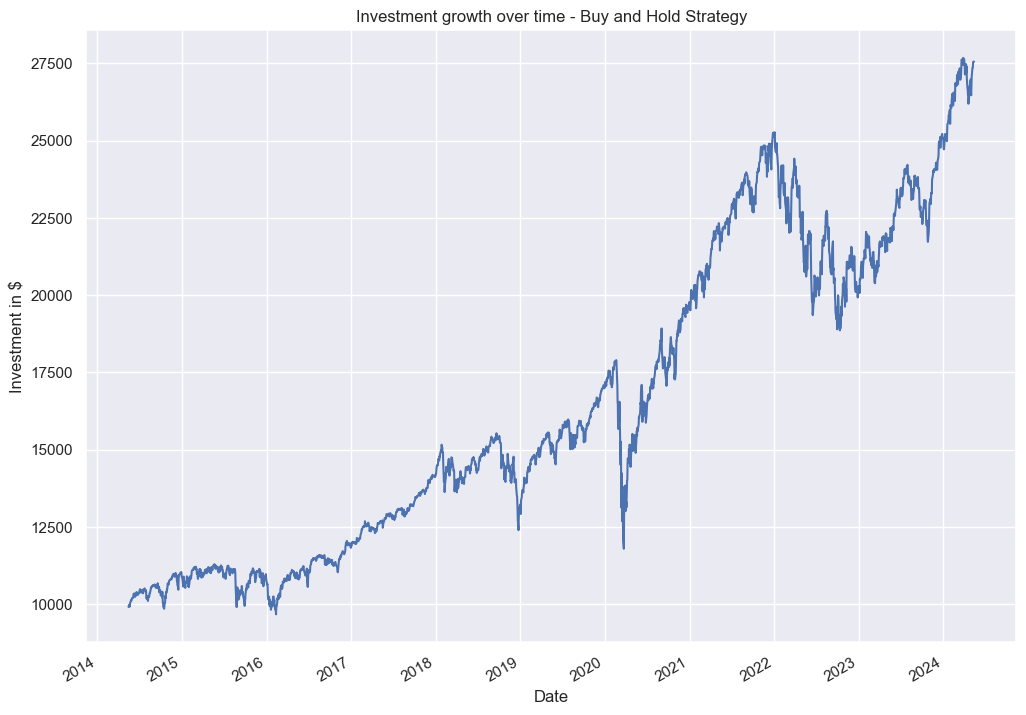

In [8]:
s1_investment_graph = s1_investment_growth.plot(figsize = (12,9))
plt.title("Investment growth over time - Buy and Hold Strategy")
plt.xlabel("Date")
plt.ylabel("Investment in $")

### Strategy 2 - Intraday Trading - Buy at Open and Sell at Close

In [9]:
s2_daily_returns = df["Close"] / df["Open"] - 1

In [10]:
s2_cumulative_returns = (1+ s2_daily_returns).cumprod() - 1

In [11]:
s2_investment_growth = (1 + s2_cumulative_returns) * investment_amount

Text(0, 0.5, 'Investment amount $')

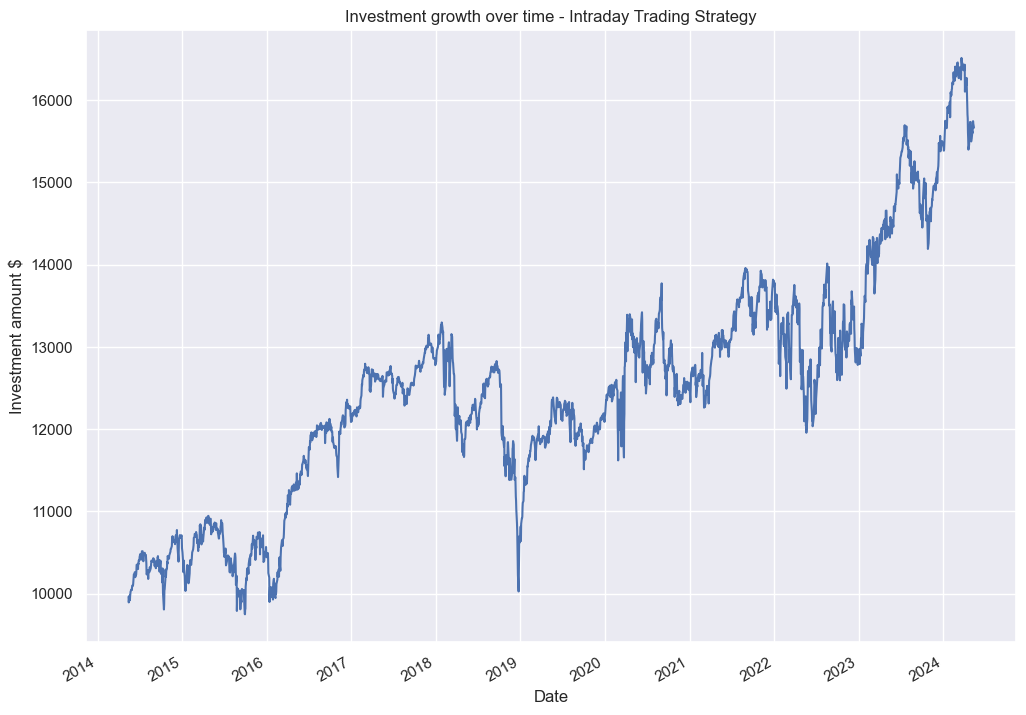

In [12]:
s2_investment_graph = s2_investment_growth.plot(figsize = (12,9))
plt.title("Investment growth over time - Intraday Trading Strategy")
plt.xlabel("Date")
plt.ylabel("Investment amount $")

### Strategy 3 - Overnight Trading Strategy - Buy at Close and Sell at Open

In [13]:
s3_daily_returns = df["Open"] / df["Close"].shift(1) - 1

In [14]:
s3_cumulative_returns = (1 + s3_daily_returns).cumprod() - 1

In [15]:
s3_investment_growth = (1 + s3_cumulative_returns) * investment_amount

Text(0, 0.5, 'Investment amount $')

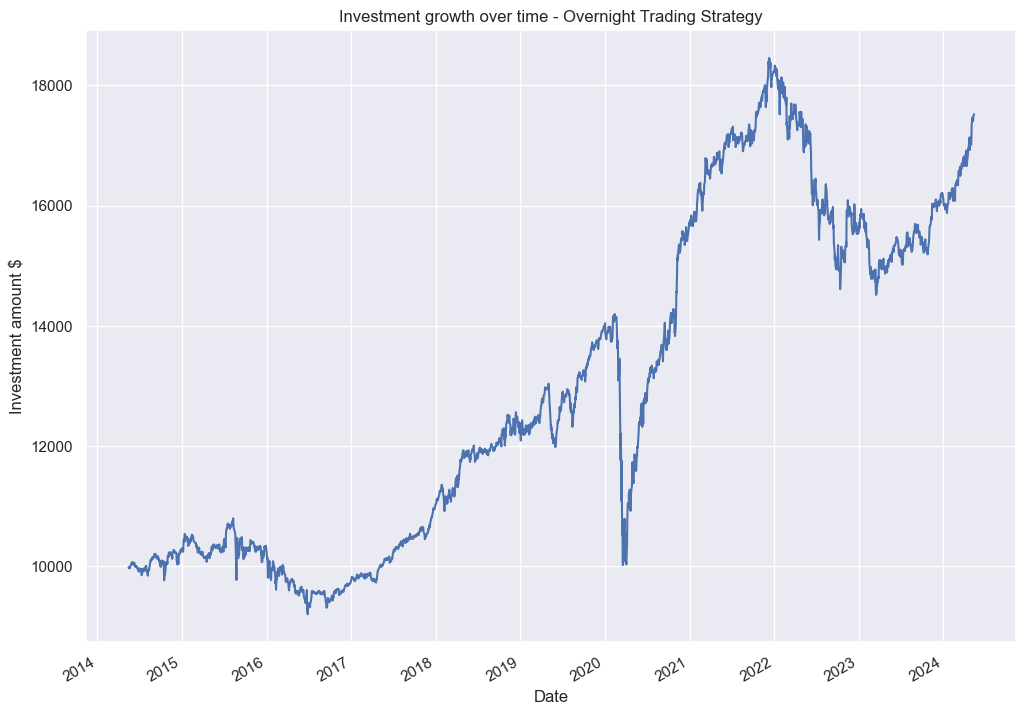

In [16]:
s3_investment_graph = s3_investment_growth.plot(figsize = (12,9))
plt.title("Investment growth over time - Overnight Trading Strategy")
plt.xlabel("Date")
plt.ylabel("Investment amount $")

### Cumulative Plot - Comparing all the strategies 

Text(0, 0.5, 'Investment amount $')

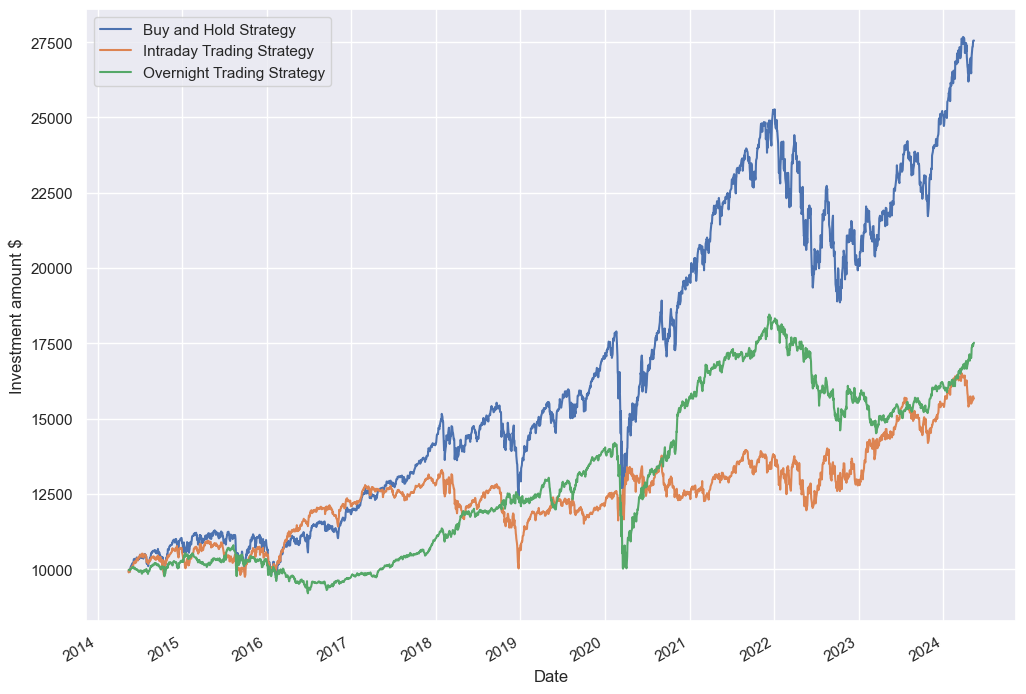

In [17]:
s1_investment_growth.plot(figsize = (12,9), label = "Buy and Hold Strategy")
s2_investment_growth.plot(label = "Intraday Trading Strategy")
s3_investment_growth.plot(label = "Overnight Trading Strategy")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Investment amount $")

### Analysis

- 10,000 investment in Buy and Hold Strategy would have resulted in net amount of 27,552
- 10,000 investment in Intraday Trading Strategy would have resulted in net amount of 15,665
- 10,000 investment in Overnight Trading Strategy would have resulted in net amount of 17,520

### Buy and Hold Strategy 

Advantages:
- Dividend Reinvestment: The buy-and-hold strategy with the SPY ETF enables the reinvestment of dividends, which enhances compound growth.
- Simplicity: Easy to implement and maintain, requiring minimal active management and decision-making.
- Tax Efficiency: Benefits from lower long-term capital gains tax rates for holdings kept over a year.

Disadvantages:
- Market Risk: Exposed to full market volatility, which can lead to significant temporary declines.
- Liquidity Constraints: Funds are tied up long-term, potentially limiting access to cash for other opportunities.
- Opportunity Cost: Misses out on potentially higher short-term gains from more active trading strategies.

### Intraday Trading Strategy

Advantages:

- Limited Overnight Risk: Avoids the risk of price fluctuations due to events that occur outside of market hours.
- Potential for Daily Profits: Opportunities to profit from daily market movements.
- Active Management: Allows for daily reassessment and adjustment of positions, potentially reducing exposure during downturns.
  
Disadvantages:

- High Transaction Costs: Frequent trading increases commission costs and impacts net returns.
- Tax Inefficiency: Profits are taxed as short-term capital gains, which are higher than long-term rates.
- High Intensity and Time-Consuming: Requires constant monitoring and decision-making every trading day.

### Overnight Trading Strategy 

Advantages:

- Capitalizing on the Overnight Effect: Potentially higher average returns due to overnight news and global market adjustments.
- Less Competition: Fewer traders actively trading overnight, which might provide opportunities not available during regular hours.
- Avoids Intraday Volatility: Not exposed to the intraday market noise and fluctuations.
    
Disadvantages:

- Unexpected News Risk: Vulnerable to overnight news events that can cause significant price swings.
- Transaction Costs: Though less frequent than intraday, still higher transaction costs compared to buy-and-hold.
- Tax Implications: Like intraday, profits are subject to higher short-term capital gains taxes.
